# Multiple Linear Regression

The focus of this notebook is on multiple linear regression using the `statsmodels` package in Python.

In [48]:
# Import libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [49]:
# Load the dataset

penguins = sn.load_dataset("penguins")

In [50]:
# Display the first few rows of the dataset

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**NOTE:** Recall that the default for `head()` is to show the first 5 rows. If you change the value for `n`, you can show more rows. For example the command `penguins.head(3)` will show 3 rows.

From the first 5 rows of the data set, we can see that there are several columns available: `species`, `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. There also appears to be some missing data.

In [51]:
# Handle missing values

penguins = penguins.dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [52]:
# Basic info 

penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [53]:
# Categories within the `sex` variable

penguins["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [54]:
# Categories within the `species` variable

penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [55]:
# Isolate the independent variables

X = penguins[["bill_length_mm", "sex", "species"]]
X.head()

,bill_length_mm,sex,species
0,39.1,Male,Adelie
1,39.5,Female,Adelie
2,40.3,Female,Adelie
4,36.7,Female,Adelie
5,39.3,Male,Adelie


In [56]:
# Isolate the dependent variable

y = penguins[["body_mass_g"]]
y.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0


In [57]:
# Split the dataset into 70% training set and 30% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**NOTE:** We have set the `test_size` variable to 0.3, which tells the function what proportion of the data should be in the testing set. Additionally, we have set the `random_state` variable equal to `42` for reproducibility. If you change the `random_state`, your testing and training data sets will be different, and so your model may perform differently.

In [58]:
# Take a look at the first few rows of features in training set

X_train.head()

,bill_length_mm,sex,species
27,40.5,Female,Adelie
292,48.2,Male,Gentoo
302,47.4,Female,Gentoo
62,37.6,Female,Adelie
181,52.8,Male,Chinstrap


In [59]:
# Take a look at the first few rows of features in testing set

X_test.head()

,bill_length_mm,sex,species
30,39.5,Female,Adelie
317,46.9,Female,Gentoo
79,42.1,Male,Adelie
201,49.8,Female,Chinstrap
63,41.1,Male,Adelie


In [60]:
# Take a look at the first few rows of labels in training set

y_train.head()

,body_mass_g
27,3200.0
292,5100.0
302,4725.0
62,3600.0
181,4550.0


In [61]:
# Take a look at the first few rows of labels in testing set

y_test.head()

,body_mass_g
30,3250.0
317,4875.0
79,4000.0
201,3675.0
63,4050.0


We'll focus on understanding some of the variables' relationships with body mass (g). We'll use one continuous X variable, bill length (mm), and the two categorical variables, gender and species.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model.

In [62]:
# Specify the formula for OLS

ols_formula = "body_mass_g ~ bill_length_mm + C(sex) + C(species)"
ols_formula

'body_mass_g ~ bill_length_mm + C(sex) + C(species)'

**NOTE:** The names of the X and y variables have to match the column names in the dataframe exactly.

In [63]:
# Specify the data that will be used for OLS

ols_data = pd.concat([X_train, y_train], axis = 1)
ols_data.head()

,bill_length_mm,sex,species,body_mass_g
27,40.5,Female,Adelie,3200.0
292,48.2,Male,Gentoo,5100.0
302,47.4,Female,Gentoo,4725.0
62,37.6,Female,Adelie,3600.0
181,52.8,Male,Chinstrap,4550.0


In [64]:
# Instantiate OLS object

OLS = ols(formula = ols_formula, data = ols_data)
OLS

In [65]:
# Fit the OLS object to the training data, save the resulting model

model = OLS.fit()
model

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: *multicollinearity*. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model Assumption - Linearity

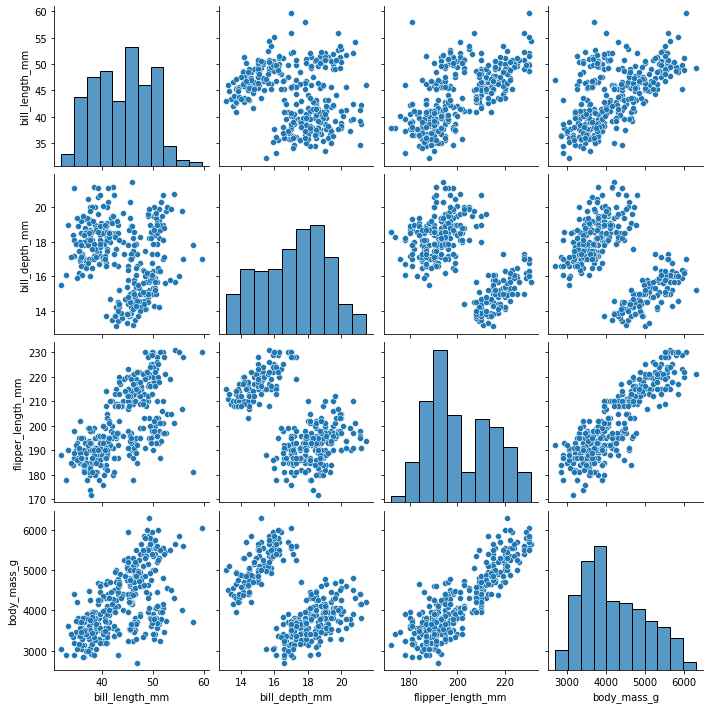

In [66]:
# Visualize pairwise relationships between variables in the data

sn.pairplot(data=penguins)
plt.show()

There appears to be a linear relationship between body mass and bill length.

### Model Assumption - Independence

The independent observation assumption states that each observation in the dataset is independent. As penguin (i.e., row) is independent from one another, the independence assumption is not violated.

### Model Assumption - Normality

Create the following plots to check the normality assumption:
* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

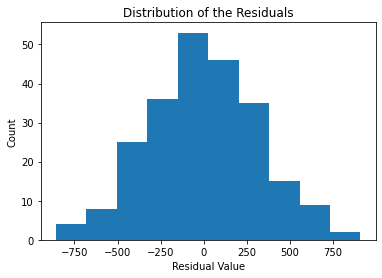

In [67]:
# Get the residuals from the model

### YOUR CODE HERE

residuals = model.resid

# Check if the residuals are normally distributed

### YOUR CODE HERE

plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

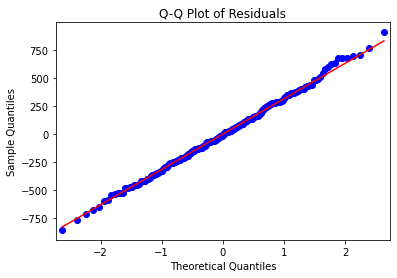

In [68]:
# Create a Q-Q plot to confirm normality assumption 

### YOUR CODE HERE

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

The histogram of the residuals are approximately normally distributed, which supports the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting the normality assumption is met.

### Model Assumption - Homoscedasticity

Check the constant variance assumption is not violated by creating a scatter plot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

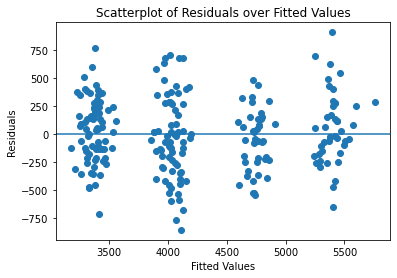

In [69]:
# Get the fitted values

### YOUR CODE HERE

fitted_values = model.predict(X_train)

# Create a scatter plot

### YOUR CODE HERE

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

The fitted values are in four groups because the categorical variables are dominating in this model.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model Assumption - Multicollinearity

The no multicollinearity assumption states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:
* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

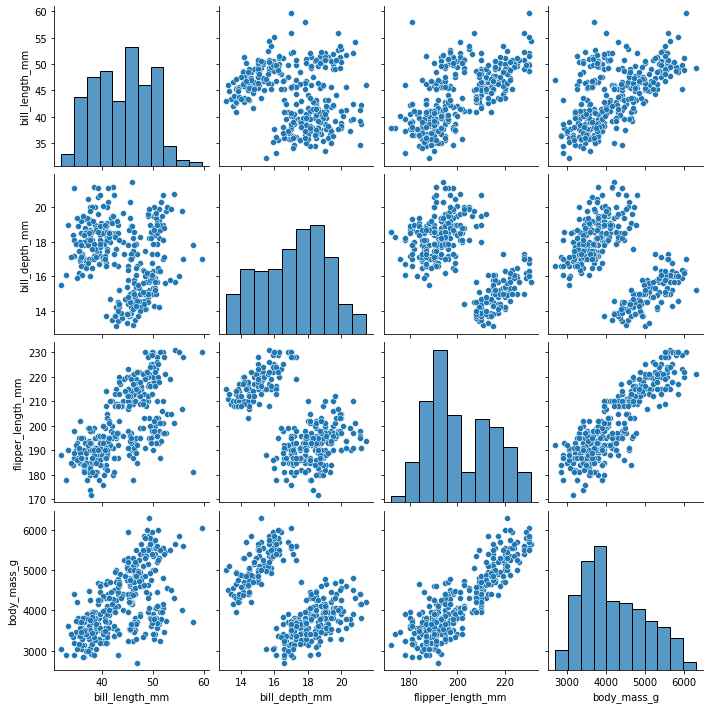

In [70]:
# Create a pairplot of the data

### YOUR CODE HERE ### 

sn.pairplot(penguins)

### Model Assumption - Multicollinearity

The no multicollinearity assumption states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:
* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

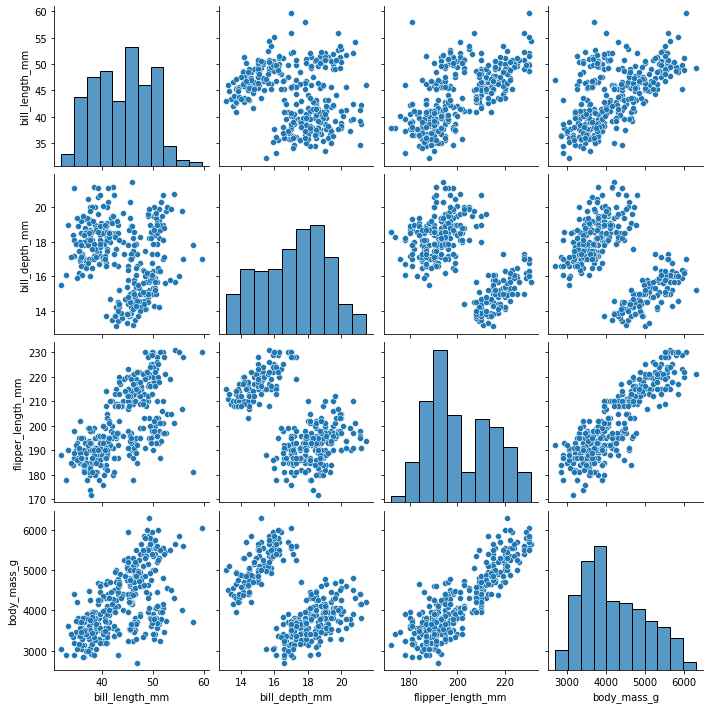

In [71]:
# Create a pairplot of the data

### YOUR CODE HERE ### 

sn.pairplot(penguins)

The model above only has one continous independent variable, meaning there are no multicollinearity issues. 

Use the `.summary()` function to get a summary table of model results and statistics.

In [72]:
# Display summary of model results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.31e-92
Time:                        18:19:05   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(sex)[T.Male]            528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focuse on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

We can then interpret each of the beta coefficients for each X variable.

### C(gender) - Male
Given the name of the variable, we know that the variable was encoded as `Male = 1`, `Female = 0`. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

### C(species) - Chinstrap and Gentoo
Given the names of these two variables, we know that Adelie penguins are the reference point. So if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

### Bill Length (mm)
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

In [73]:
# Use the model to make predictions on the test data

preds = model.predict(X_test)
preds

30     3436.455443
317    4781.153714
79     4057.837531
201    3517.238973
63     4022.287040
          ...     
20     3376.019609
7      3954.741109
215    4259.492729
99     4096.943070
35     3954.741109
Length: 100, dtype: float64